# Laboratorio de Métodos Computacionales
## Ejercicio 1 - Solución

Las funciones de Bessel $J_m(x)$ están definidas como

$$J_m(x) = \frac{1}{\pi}\int_0^\pi\cos(m\theta-x\sin\theta)\mathrm{d}\theta$$

Escriba un programa que utilize la regla de Simpson para hallar funciones de Bessel $J_m(x)$ utilizando la regla de Simpson con $N=1000$ puntos. Grafique las funciones $J_0(x)$, $J_1(x)$ y $J_2(x)$ entre $x=0$ y $x=20$.

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


La siguiente función retorna el integrando de la función de Bessel $J_m(x)$. Sus parámetros son $m$, $x$ y la variable de integración $t$.

In [2]:
def bessel_integrand(m, x, t):
    return 1.0/np.pi * np.cos(m*t - x*np.sin(t))

La siguiente función realiza la integral entre $a$ y $b$ de la función $f$ para un número de pasos $N$ utilizando la regla de Simpson. Los parámetros $m$ y $x$ son los correspondientes a $J_m(x)$.

In [3]:
def simpson(f, a, b, N, m, x):
    if N%2 == 1:
        N += 1
    h = (b-a)/N
    result = f(m,x,a) + f(m,x,b)
    for i in range(1, N, 2):
        result += 4*f(m,x,a + i*h)
    for i in range(2, N-1, 2):
        result += 2*f(m,x,a + i*h)
    result *= h/3.0
    return result

Note que una integral corresponde a un punto de las gráficas que se quieren obtener. Entonces, la siguiente función realiza el procedimiento varias veces, generando arreglos para el eje $X$ y el eje $Y$ de las gráficas

In [4]:
def plot_bessel(m):
    X = np.linspace(0,20,41)
    Y =np.zeros(41)
    for i in list(range(len(X))):
        Y[i]=simpson(bessel_integrand, 0.0, np.pi, 1000, m, X[i])
    
    plot(X,Y)
    plt.xlabel("$x$", fontsize = "15")
    plt.ylabel("$J_m(x)$", fontsize = "15")
    plt.title("$m = $"+str(m), fontsize="15")
    plt.show()
    plt.close()

Ahora sólo queda llamar esta función para cada $m$.

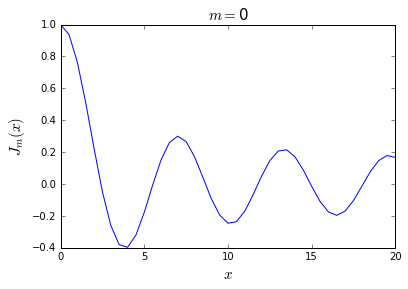

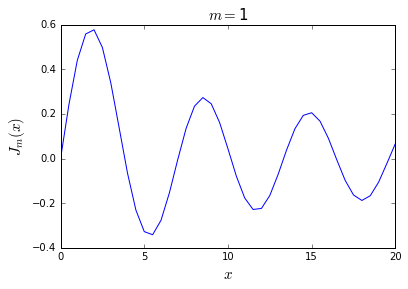

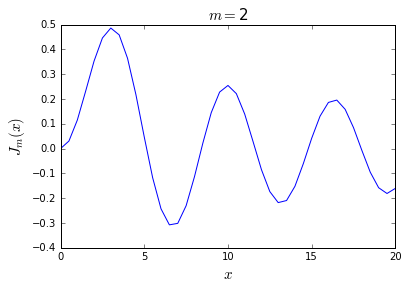

In [5]:
plot_bessel(0)
plot_bessel(1)
plot_bessel(2)

Podemos verificar esto utilizando las funciones de Bessel de scipy. De nuevo se grafican en su orden para $m=0,1,2$.

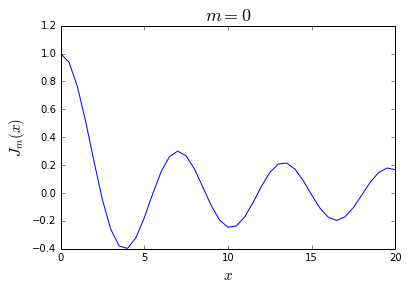

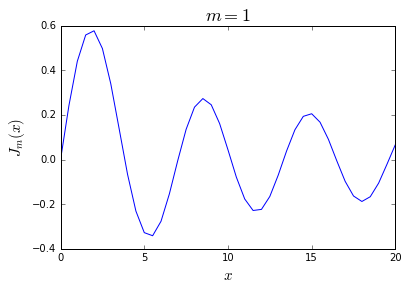

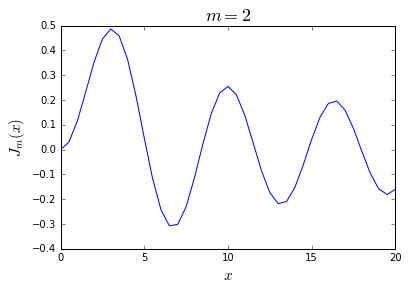

In [6]:
import scipy.special
X = np.linspace(0,20,41)

plot(X,scipy.special.jn(0,X))
plt.xlabel("$x$", fontsize = "15")
plt.ylabel("$J_m(x)$", fontsize = "15")
plt.title("$m = 0$", fontsize="18")
plt.show()
plt.close()

plot(X,scipy.special.jn(1,X))
plt.xlabel("$x$", fontsize = "15")
plt.ylabel("$J_m(x)$", fontsize = "15")
plt.title("$m = 1$", fontsize="18")
plt.show()
plt.close()

plot(X,scipy.special.jn(2,X))
plt.xlabel("$x$", fontsize = "15")
plt.ylabel("$J_m(x)$", fontsize = "15")
plt.title("$m = 2$", fontsize="18")
plt.show()
plt.close()